Libraries

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
#read the data
df = pd.read_csv('data_for_kmean.csv')

In [3]:
#open dataframe
df.info()
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


,Feature 1,Feature 2
0,-6.428841,10.141117
1,5.868679,5.201104
2,-0.376109,3.264279
3,2.166792,9.563005


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

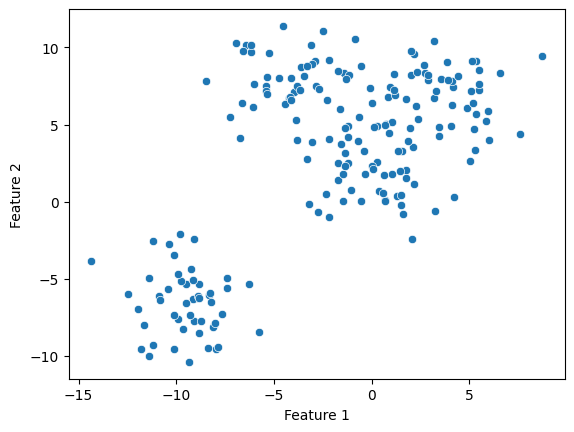

In [4]:
# scatter plot
sns.scatterplot(x=df['Feature 1'], y=df['Feature 2'])

In [5]:
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [6]:
kmeans.fit(df)  # train the whole dataset

KMeans(n_clusters=4)

In [7]:
kmeans.labels_

array([3, 1, 2, 1, 1, 0, 1, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 2, 1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 0, 2, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 2, 2, 3, 1, 2, 0, 3, 2, 2, 3, 1, 0, 1, 0, 3, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 3, 2, 2, 0, 1, 0, 2, 2, 2, 3,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 2, 3, 2, 3, 2, 1, 3, 2, 0, 3, 3, 3,
       2, 0, 0, 3, 1, 3, 1, 2, 0, 1, 0, 3, 3, 1, 2, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 1, 1, 2, 1, 2, 2, 3, 0, 3, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 1, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 1, 3, 0, 2, 1, 1,
       0, 2])

In [10]:
kmeans.cluster_centers_     # we can see the coordinate cluster of our final centroid points here

array([[-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [11]:
# we want to bring those labls into our dataframe
df_k = df

In [12]:
df_k['Lable(K=4)']= kmeans.labels_

In [13]:
df_k

,Feature 1,Feature 2,Lable(K=4)
0,-6.428841,10.141117,3
1,5.868679,5.201104,1
2,-0.376109,3.264279,2
3,2.166792,9.563005,1
4,5.095086,7.207527,1
...,...,...,...
195,0.671402,4.975115,2
196,6.560002,8.351321,1
197,5.134971,9.125419,1
198,-9.261985,-4.336104,0


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

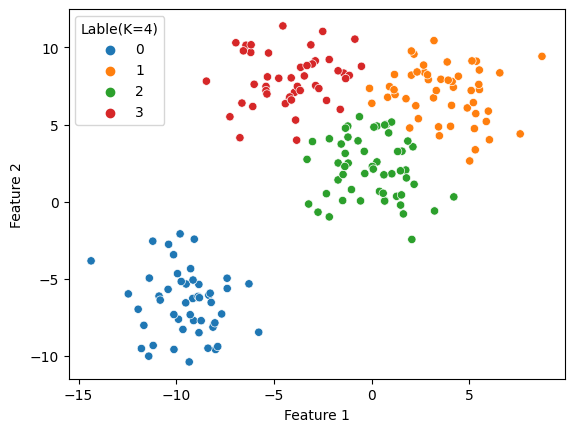

In [14]:
# scatter plot with considering the labels
sns.scatterplot(data=df_k, x='Feature 1',y='Feature 2',hue='Lable(K=4)',palette='tab10')

In [15]:
kmeans1 = KMeans(n_clusters=2)

In [16]:
kmeans1.fit(df)

KMeans(n_clusters=2)

In [17]:
df_k['Lable(K=2)']=kmeans1.labels_

In [18]:
df_k

,Feature 1,Feature 2,Lable(K=4),Lable(K=2)
0,-6.428841,10.141117,3,0
1,5.868679,5.201104,1,0
2,-0.376109,3.264279,2,0
3,2.166792,9.563005,1,0
4,5.095086,7.207527,1,0
...,...,...,...,...
195,0.671402,4.975115,2,0
196,6.560002,8.351321,1,0
197,5.134971,9.125419,1,0
198,-9.261985,-4.336104,0,1


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

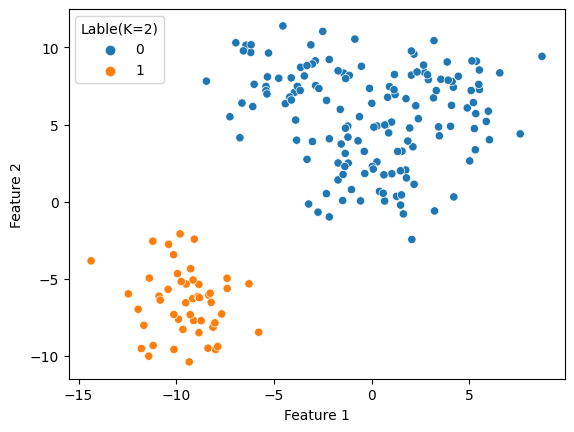

In [19]:
# scatter plot with considering the NEW labels

sns.scatterplot(data=df_k, x='Feature 1',y='Feature 2',hue='Lable(K=2)',palette='tab10')

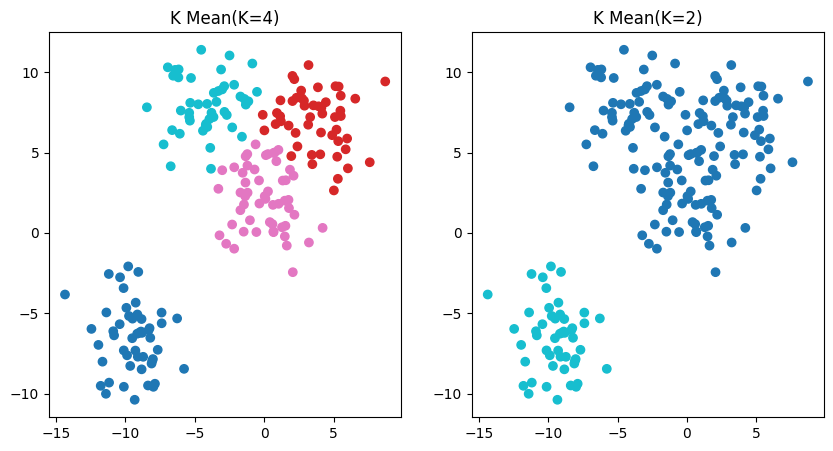

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('K Mean(K=4)')
ax1.scatter(x=df_k['Feature 1'],y=df_k['Feature 2'],c=df_k['Lable(K=4)'], cmap='tab10')

ax2.set_title('K Mean(K=2)')
ax2.scatter(x=df_k['Feature 1'],y=df_k['Feature 2'],c=df_k['Lable(K=2)'], cmap='tab10')

# Create Dataset

In [22]:
# Create fake dataset in sklearn
from sklearn.datasets import make_blobs

In [23]:
# Create Data

data =make_blobs(n_samples =200, n_features=2, centers=4 ,cluster_std = 1.8, random_state = 101)
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [24]:
type(data)

tuple

In [25]:
len(data)

2

In [26]:
data[0]               # [0][:,0] [0][:,1] -> create two features

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [27]:
type(data[0])

numpy.ndarray

In [28]:
len(data[0])

200

In [29]:
data[1]  #The input are the cluster centers=4

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [30]:
data[0][1]

array([5.86867888, 5.20110356])

In [31]:
data[0][:,0]

array([-6.42884095e+00,  5.86867888e+00, -3.76109375e-01,  2.16679181e+00,
        5.09508570e+00, -1.08788882e+01,  2.03405554e+00, -1.71798771e+00,
        1.16911341e+00, -1.35185444e+00, -6.18548214e+00, -1.19856602e+00,
        2.90296863e+00,  2.39250023e+00, -5.27545147e+00, -5.66814687e-01,
        5.97336628e+00, -2.31355268e+00, -1.01344756e+01, -4.54082629e+00,
       -1.04155833e+01,  6.64796693e-01,  2.11460477e+00, -1.11790221e+01,
       -6.63698251e+00, -7.67422005e+00, -7.98668260e+00,  1.27983684e+00,
        3.54480244e+00,  4.03940181e+00, -2.88118898e+00, -9.11009911e+00,
        5.26001172e+00,  2.05859724e+00, -1.71289834e+00, -5.40562319e+00,
       -1.11995123e+01, -1.13753641e+01, -1.17821836e+01,  1.74815503e+00,
       -9.00392334e+00, -2.86564584e+00, -1.42742293e+00, -3.10933432e+00,
        2.71130095e-01,  8.21556561e-01, -4.11495481e+00,  1.55414928e+00,
       -1.16546211e+01, -1.22009637e+00,  3.22017630e+00, -5.40452892e+00,
        6.02795351e+00,  

In [32]:
data[0][:,1]

array([ 10.14111739,   5.20110356,   3.26427943,   9.56300522,
         7.20752718,  -6.1131804 ,   9.76664755,   1.4140114 ,
         8.24556988,   3.13245345,   9.67406555,   2.50408937,
         7.91251003,   5.38173971,   9.63836659,   0.05602628,
         5.87172022,   0.52398009,  -3.43130837,  11.39201739,
        -5.67545836,   0.09423047,   3.55938488,  -9.30976605,
         6.39426436,  -7.26839654,  -9.57113308,   0.35315078,
         7.93535678,   4.88870433,   9.12919391,  -7.6978166 ,
         4.74007434,  -2.44083039,   2.51221197,   7.47228315,
        -2.55276744,  -4.94525091,  -9.50883007,   2.05595679,
        -6.20816203,   7.52934153,   8.33519078,  10.16414643,
         2.58303824,   6.76966806,   8.02621345,   3.27657687,
        -8.0067372 ,   4.90466211,  -0.5949262 ,   7.19997027,
         4.0169624 ,   0.67345201,  -5.61883075,   5.98523639,
         4.462053  ,   1.81203497,   5.29262653,   6.73039191,
        -7.95924003,   7.46139251,  -4.95353352,   8.48

In [33]:
# Create Dataset

df_dict = {'Feature 1': data[0][:,0],'Feature 2': data[0][:,1] }

In [34]:
# convert dictionary to the dataframe
final_df = pd.DataFrame.from_dict (df_dict)

In [35]:
final_df.to_csv('data_for_kmean.csv', index = False)

# Elbow Method

In [36]:
# if we don't have a domain knowledge ->   Elbow Method to find the optimum cluster

In [37]:
K=1

In [38]:
kmeans = KMeans(n_clusters=K)

In [39]:
kmeans.fit(df)

KMeans(n_clusters=1)

In [40]:
##SSE = the sum of the squared differences between each point and it's centroid.
kmeans.inertia_ 

12913.413683268438

In [41]:
sse={}

for K in range (1, 10):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(df)
    sse[K] = kmeans.inertia_

In [42]:
sse

{1: 12913.413683268438,
 2: 3895.0562432746738,
 3: 2315.4633931348403,
 4: 1318.403572554749,
 5: 1145.9284693866916,
 6: 999.7941976090449,
 7: 898.1457982346875,
 8: 772.8447719629972,
 9: 674.3258426764443}

Text(0, 0.5, 'SSE')

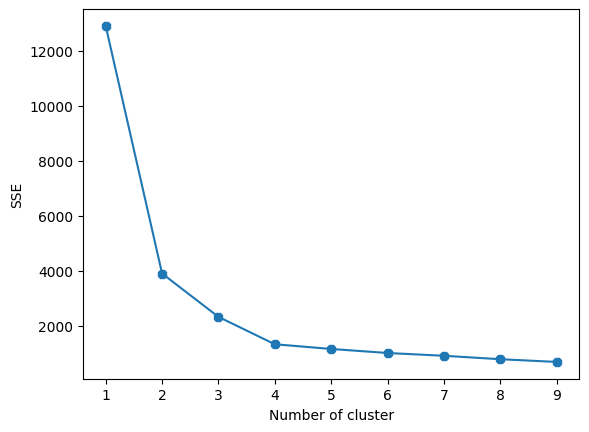

In [44]:
plt.plot(list(sse.keys()), list(sse.values()), marker ="8")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")